# Twitter Sentiment Analysis

<font size ='5'>**Problem statement**</font>
<br>
<br>
<font size ='4'>*Analaysis and visualization of a select set of tweets and the classification of tweets in the test set based on tweets in the train set*</font>
<br>
<br>

<font size ='4'>**Libraries used**</font>
* Numpy
* Pandas
* Seaborn (visualization)
* Matplotlib (visualization)
* Wordcloud (visualization)
* NLTK (Text analysis and processing)
* SPACY (Text analysis and processing)
* Sklearn (Model building and deployment)
* Genism ( Model building - Word vectors using Word2vec )

<font size ='4'>**Pre-requisites**</font>
* Knwoledge of using numpy, pandas, seaborn and Matplotlib libraries
* Basic knowledge of python

### Importing required libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
sns.set(style= 'whitegrid',font_scale = 1.2)
import matplotlib.pyplot as plt 

In [3]:
import nltk  # for text manipulation 
nltk.download('wordnet')
import string 
import warnings 
 

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import spacy
# import en_core_web_md
# nlp = en_core_web_md.load()
nlp = spacy.load('en_core_web_md') 

### Loading the datasets

In [5]:
train  = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

## Data Inspection

<font size='4'> In the given data, the target label **0** corresponds to **Non-Racial tweets** whereas taregt label **1** corresonds to **racial tweets**</font>

<font size='3'> Inspecting **non racial tweet**</font>

In [6]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


<font size='3'> Inspecting **racial tweet**</font>

In [7]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


<br>

<font size='3'> As we can see, many of the tweets have a lot of non word and non digit characters,puncutations and some even have characters not present in english language, hence to make our predictions more accurate and for better visualizations, we need to do some data cleaning and pre-processing , where we will remove punctuations and other characters which do not help in improving the accuracy of our predictions and classification</font>

In [8]:
train.shape, test.shape

((31962, 3), (17197, 2))

<font size ='3'> There are 31962 tweets in train set and 17197 tweets in test set.</font>

In [9]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<font size ='3'>Clearly , we can see that target labels are imbalanced, hence we have at our disposal an imbalanced data set, which is skewed towards 0 target label</font>

<br>

In [10]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


<br>


## Combining train and test data

In [11]:
train_features = train.drop('label',1)
train_target = train['label']

In [12]:
all_data = train.append(test, ignore_index=True) 
all_data.shape

C:\Users\vaibhav\Anaconda3\envs\nlp_course\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [13]:
all_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


<br>

# Overview of Regular Expressions

<font size ='5'>What is a regular expression?</font>
<br>
<br>
<font size='4'>**REGular EXpression or regex:**</font>

<font size ='4'>It is a String containing a combination of normal characters,special metacharacters and quantifiers that describes patterns to find text or positions within a text.
<br>
It is represented as **r'pattern'**</font>
<br>
<br>
<font size ='4'>For example **r'cat\d\s\w{3,10}'**
<br>
    
* Normal characters match themselves ( cat )
<br>
* Metacharacters represent types of characters ( \d , \s , \w )
<br>
* Quantifiers are represented by curly brackets *{3,10}*  </font>   

### Importing regular expressions

In [14]:
import re    # for regular expressions 

<br>
<br>

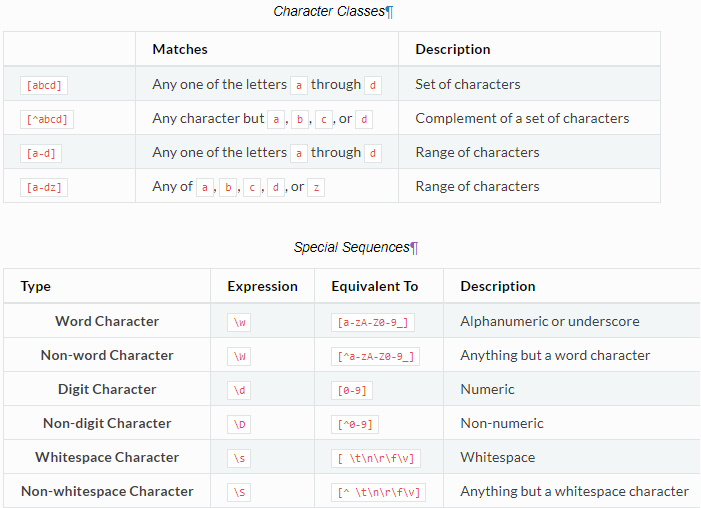


<font size ='3'> In regular expressions the square brackets **[ ]** acts as an **OR operator**. Anything inside the square brackets is added with an OR condition in between.For example **[a-z0-9A-z]** means matching all the lower and upper case english alphabets along with all the numeric digits.</font>

<br>

### Quantifiers in RE

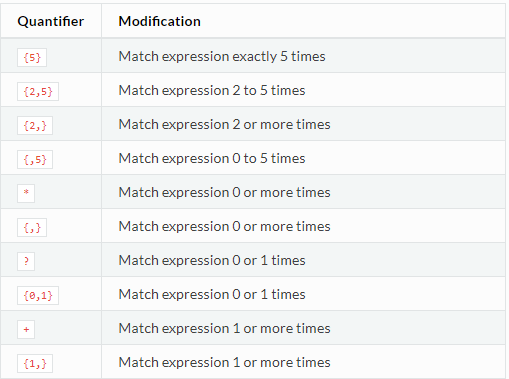

## Important methods in regular expressions

### (1.)    re.finall()

<font size ='3'>The __re.finall()__ method of the re module can be used to find all the specified paterns in a string or a document.

The syntax for re.findall() is **re.findall(pattern,string)**.

That will find all the matches of the defined pattern in the string and compile them into a list.</font>

### (2.)    re.sub()

<font size ='3'>The __re.sub()__ method of the re module can be used to replace substrings. 

The syntax for re.sub() is **re.sub(pattern,repl,string)**. 

That will replace the matches in string with repl.</font>

### (3.)    re.split()

<font size ='3'>The __re.split()__ method of re module can be used to for tokenisation (we'll get back to this later), i.e deviding documents and sentences into individual string objects or words. 

The syntax for re.split() is **re.split(pattern,string)**. 

That will split the string whenever the specified pattern in encountered in the string and form a list of resulting objects.</font>

### (4.)    re.search()

<font size ='3'>The __re.search()__ method of re module can be used to Return a match object if a specified pattern is found in the string. 

The syntax for re.search() is **re.search(pattern,string)**. 

</font>


# Data Cleaning

## (1.) Removing Twitter Handles (@user)

   <font size = '3'>   Custom function to remove unwanted text patterns from the tweets using regular expressions.</font>

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt) #the findall fuction returns a list
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [16]:
all_data['tidy_tweet'] = np.vectorize(remove_pattern)(all_data['tweet'], "@[\w]*") 
all_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation



The purpose of __np.vectorize__ is to transform functions which are not numpy-aware (e.g. take floats as input and return floats as output) into functions that can operate on (and return) numpy arrays.

It takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays. The vectorized function evaluates pyfunc over successive tuples of the input arrays like the python map function, except it uses the broadcasting rules of numpy.

<br>
    

## (2.) Removing Punctuations, Numbers, and Special Characters

### Exclusion


<font size='3'> To exclude characters, we can use the [^ **`symbol in conjunction with a set of brackets`**]. Anything inside the brackets is excluded.</font>

In [17]:
all_data['tidy_tweet'] = all_data['tidy_tweet'].str.replace("[^a-zA-Z#']", " ") 
all_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


 ##  (3.) Tokenization and Removing Stop Words

### Stopwords

<font size ='3'>Words like "a", "the", "in" appear so frequently in a document that they don't require tagging as thoroughly as nouns, verbs and modifiers.They also don't add much useful information. We call these ***stop words***, and they can be filtered from the text to be processed. SpaCy holds a built-in list of some 305 English stop words.</font>

<font size ='3'> Following is the way in which we access the stop words in Spacy and NLTK libraries</font>

In [18]:
spacy_stopwords = nlp.Defaults.stop_words

In [19]:
nltk_stopwords = nltk.corpus.stopwords.words('english')

<font size ='3'> **Adding custom words to stopword librariers**</font>
<br>
<br>
<font size ='3'>There may be times when you wish to add a stop word to the default set. Perhaps you decide that `'btw'` (common shorthand for "by the way") should be considered a stop word.</font>

In [20]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')
nlp.Defaults.stop_words.add('u')
nlp.Defaults.stop_words.add('ur')
nlp.Defaults.stop_words.add('I')


# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True
nlp.vocab['u'].is_stop = True
nlp.vocab['ur'].is_stop = True
nlp.vocab['I'].is_stop = True

<br>

## Tokenization

<font size ='4'> Below we see how the spacy and nltk libraries breaks down or **tokenize** a sentence</font>

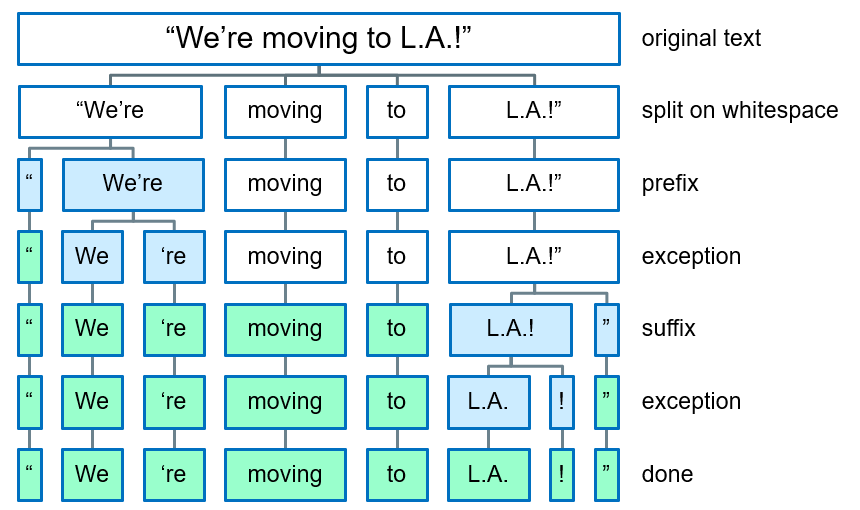

<font size ='3'> Here we will use nltk to tokenize our tweets</font>

In [21]:
from nltk.tokenize import word_tokenize
# nltk.download()

In [22]:
def func_stop_spacy(x):
    tokens = word_tokenize(x)
    tokens = [token for token in tokens if not token in spacy_stopwords]
    return tokens

In [23]:
def func_stop_nltk(x):
    tokens = x.split()
    tokens = [token for token in tokens if not token in spacy_stopwords]
    return tokens

<font size ='3'> Here we hav'nt used a spacy or NLTK tokenizer because as we will see below, it splits the hashtag words, i.e it splits #black into #, black. But we need hashtags like #black for further visualizations. Hence we split our tweets on spaces using **.split()** method of string class</font>

In [24]:
all_data['token_nltk'] = all_data['tidy_tweet'].apply(func_stop_nltk)

In [25]:
all_data['token_spacy'] = all_data['tidy_tweet'].apply(func_stop_spacy)

In [26]:
 all_data['tidy_tweet_spacy'] = all_data['token_spacy'].apply(lambda x: ' '.join(x)) 

In [27]:
 all_data['tidy_tweet_nltk'] = all_data['token_nltk'].apply(lambda x: ' '.join(x)) 

In [28]:
all_data.head()

,id,label,tweet,tidy_tweet,token_nltk,token_spacy,tidy_tweet_spacy,tidy_tweet_nltk
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,"[father, dysfunctional, selfish, drags, kids, dysfunction, #run]","[father, dysfunctional, selfish, drags, kids, dysfunction, #, run]",father dysfunctional selfish drags kids dysfunction # run,father dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx #disapointed #getthanked,"[thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, vans, pdx, #disapointed, #getthanked]","[thanks, #, lyft, credit, n't, use, cause, n't, offer, wheelchair, vans, pdx, #, disapointed, #, getthanked]",thanks # lyft credit n't use cause n't offer wheelchair vans pdx # disapointed # getthanked,thanks #lyft credit can't use cause don't offer wheelchair vans pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, majesty]","[bihday, majesty]",bihday majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,"[#model, love, time]","[#, model, love, time]",# model love time,#model love time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,"[factsguide, society, #motivation]","[factsguide, society, #, motivation]",factsguide society # motivation,factsguide society #motivation


</font>

<font size ='3'> We can clearly see in the ***token_spacy*** column that the words like *can't* and *don't* have been broken into can and not, and do and not respectively. But the words can and do have been removed as they were stopwords </font>

## (4.) Text Normalization - Stemming

Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "**boat" would be the stem for [boat, boater, boating, boats]**.

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. We'll talk about it in soon.

Instead we'll use NLTK  for stemming

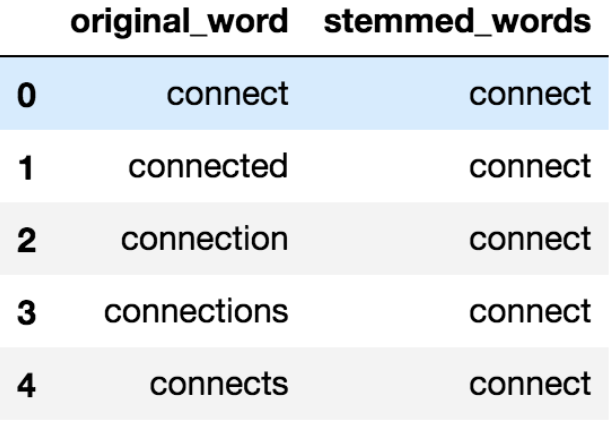

<br>

<font size ='3'>Orignally NLTK uses something known as a porter stemmer, but the algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since nltk uses the name SnowballStemmer, we'll use it here.</font>

In [29]:
from nltk.stem.snowball import SnowballStemmer

In [30]:
# from nltk.stem.porter import * 
stemmer = SnowballStemmer(language='english')
tokenized_tweet = all_data['token_nltk'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [31]:
tokenized_tweet.head()

0                                                 [father, dysfunct, selfish, drag, kid, dysfunct, #run]
1    [thank, #lyft, credit, can't, use, caus, don't, offer, wheelchair, van, pdx, #disapoint, #getthank]
2                                                                                      [bihday, majesti]
3                                                                                   [#model, love, time]
4                                                                           [factsguid, societi, #motiv]
Name: token_nltk, dtype: object

In [32]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
all_data['tweet_stem'] = tokenized_tweet

In [33]:
all_data.head()

,id,label,tweet,tidy_tweet,token_nltk,token_spacy,tidy_tweet_spacy,tidy_tweet_nltk,tweet_stem
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,"[father, dysfunctional, selfish, drags, kids, dysfunction, #run]","[father, dysfunctional, selfish, drags, kids, dysfunction, #, run]",father dysfunctional selfish drags kids dysfunction # run,father dysfunctional selfish drags kids dysfunction #run,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx #disapointed #getthanked,"[thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, vans, pdx, #disapointed, #getthanked]","[thanks, #, lyft, credit, n't, use, cause, n't, offer, wheelchair, vans, pdx, #, disapointed, #, getthanked]",thanks # lyft credit n't use cause n't offer wheelchair vans pdx # disapointed # getthanked,thanks #lyft credit can't use cause don't offer wheelchair vans pdx #disapointed #getthanked,thank #lyft credit can't use caus don't offer wheelchair van pdx #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, majesty]","[bihday, majesty]",bihday majesty,bihday majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,"[#model, love, time]","[#, model, love, time]",# model love time,#model love time,#model love time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,"[factsguide, society, #motivation]","[factsguide, society, #, motivation]",factsguide society # motivation,factsguide society #motivation,factsguid societi #motiv


<br>

<font size = '3'>Look how words like ***majesty*** and ***society*** have been altered to ***majesti*** and ***societi*** in the **tweet_stem** column. This is why we refer to stemming as a crude method for cateloging words.</font>

<font size ='4'>But there's a much better way to catelog related words into root words, i.e. ***LEMMATIZATION***</font>

In [34]:
freq2 = pd.Series(' '.join(all_data['tidy_tweet_spacy']).split()).value_counts()[:10]
freq2

#        117936
's         4969
love       4375
day        3604
n't        3439
amp        2709
happy      2642
life       1797
time       1780
like       1725
dtype: int64

In [35]:
freq2 = pd.Series(' '.join(all_data['tidy_tweet_nltk']).split()).value_counts()[:10]
freq2

day      3160
amp      2709
happy    2437
#love    2366
#        1959
love     1902
time     1709
it's     1623
i'm      1564
like     1501
dtype: int64

## (5.) Lemmatization

<font size ='3'>In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.</font>

In [36]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('amp')
nlp.Defaults.stop_words.add("n't")
nlp.Defaults.stop_words.add("it's")
nlp.Defaults.stop_words.add("i'm ")

# Set the stop_word tag on the lexeme
nlp.vocab['amp'].is_stop = True
nlp.vocab["n't"].is_stop = True
nlp.vocab["it's"].is_stop = True
nlp.vocab["i'm "].is_stop = True

<font size ='3'> **Lemmatization using NLTK** </font>

In NLTK we use the WordNetLemmatizer() of the stem library for lemmatization.

In [37]:
wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()

In [38]:
tokenized_tweet = all_data['token_nltk'].apply(lambda x: [wordnet_lemmatizer.lemmatize(i) for i in x if not i in spacy_stopwords])

In [39]:
tokenized_tweet.head()

0                                               [father, dysfunctional, selfish, drag, kid, dysfunction, #run]
1    [thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, van, pdx, #disapointed, #getthanked]
2                                                                                            [bihday, majesty]
3                                                                                         [#model, love, time]
4                                                                           [factsguide, society, #motivation]
Name: token_nltk, dtype: object

In [40]:
all_data['token_lemma_nltk'] = tokenized_tweet

In [41]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
all_data['tweet_lemma_nltk'] = tokenized_tweet

<font size ='3'> **Lemmatization using Spacy** </font>

lemmatization in spacy is done using **.lemma_** attribute of tokens extracted from the sentence or document. So first we'll convert each tweet into an nlp document using nlp() method.

In [42]:
tokenized_tweet_spacy = all_data['tidy_tweet_spacy'].apply(lambda x: [i.lemma_ for i in nlp(x) if not i in spacy_stopwords])

Please don't get confused by the use of the column ***tidy_tweet_nltk*** here instead of ***tidy_tweet_spacy***. We have used the former just so that we can get the **#hashtags** together for latter visualizations as in the column ***tidy_tweet_spacy***, the hashtag and the corresponding words have been separated, like this **# hashtage**.

In [43]:
tokenized_tweet_spacy.head()

0                                             [father, dysfunctional, selfish, drag, kid, dysfunction, #, run]
1    [thanks, #, lyft, credit, n't, use, because, n't, offer, wheelchair, van, pdx, #, disapoint, #, getthank]
2                                                                                            [bihday, majesty]
3                                                                                       [#, model, love, time]
4                                                                         [factsguide, society, #, motivation]
Name: tidy_tweet_spacy, dtype: object

In [44]:
all_data['token_lemma_spacy'] = tokenized_tweet_spacy

In [45]:
for i in range(len(tokenized_tweet_spacy)):
    tokenized_tweet_spacy[i] = ' '.join(tokenized_tweet_spacy[i])    
all_data['tweet_lemma_spacy'] = tokenized_tweet_spacy

In [46]:
all_data.head(8)

,id,label,tweet,tidy_tweet,token_nltk,token_spacy,tidy_tweet_spacy,tidy_tweet_nltk,tweet_stem,token_lemma_nltk,tweet_lemma_nltk,token_lemma_spacy,tweet_lemma_spacy
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,"[father, dysfunctional, selfish, drags, kids, dysfunction, #run]","[father, dysfunctional, selfish, drags, kids, dysfunction, #, run]",father dysfunctional selfish drags kids dysfunction # run,father dysfunctional selfish drags kids dysfunction #run,father dysfunct selfish drag kid dysfunct #run,"[father, dysfunctional, selfish, drag, kid, dysfunction, #run]",father dysfunctional selfish drag kid dysfunction #run,"[father, dysfunctional, selfish, drag, kid, dysfunction, #, run]",father dysfunctional selfish drag kid dysfunction # run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx #disapointed #getthanked,"[thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, vans, pdx, #disapointed, #getthanked]","[thanks, #, lyft, credit, n't, use, cause, n't, offer, wheelchair, vans, pdx, #, disapointed, #, getthanked]",thanks # lyft credit n't use cause n't offer wheelchair vans pdx # disapointed # getthanked,thanks #lyft credit can't use cause don't offer wheelchair vans pdx #disapointed #getthanked,thank #lyft credit can't use caus don't offer wheelchair van pdx #disapoint #getthank,"[thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, van, pdx, #disapointed, #getthanked]",thanks #lyft credit can't use cause don't offer wheelchair van pdx #disapointed #getthanked,"[thanks, #, lyft, credit, n't, use, because, n't, offer, wheelchair, van, pdx, #, disapoint, #, getthank]",thanks # lyft credit n't use because n't offer wheelchair van pdx # disapoint # getthank
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, majesty]","[bihday, majesty]",bihday majesty,bihday majesty,bihday majesti,"[bihday, majesty]",bihday majesty,"[bihday, majesty]",bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,"[#model, love, time]","[#, model, love, time]",# model love time,#model love time,#model love time,"[#model, love, time]",#model love time,"[#, model, love, time]",# model love time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,"[factsguide, society, #motivation]","[factsguide, society, #, motivation]",factsguide society # motivation,factsguide society #motivation,factsguid societi #motiv,"[factsguide, society, #motivation]",factsguide society #motivation,"[factsguide, society, #, motivation]",factsguide society # motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo,"[huge, fan, fare, big, talking, leave, chaos, pay, disputes, #allshowandnogo]","[huge, fan, fare, big, talking, leave, chaos, pay, disputes, #, allshowandnogo]",huge fan fare big talking leave chaos pay disputes # allshowandnogo,huge fan fare big talking leave chaos pay disputes #allshowandnogo,huge fan fare big talk leav chao pay disput #allshowandnogo,"[huge, fan, fare, big, talking, leave, chaos, pay, dispute, #allshowandnogo]",huge fan fare big talking leave chaos pay dispute #allshowandnogo,"[huge, fan, fare, big, talking, leave, chaos, pay, dispute, #, allshowandnogo]",huge fan fare big talking leave chaos pay dispute # allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]",camping tomorrow danny

# Visualisation

<font size ='4'>**Objective Questions**</font>

<br>

<font size ='3'> 
(1.) What are the most common words in the entire dataset?
    
(2.) What are the most common words in the dataset for negative and positive tweets, respectively?

<br>
(3.) How many hashtags are there in a tweet?

(4.) Which trends are associated with my dataset?

(5.) Which trends are associated with either of the sentiments? Are they compatible with the sentiments?
</font>

### Visualization Using WordCloud

We will perform visualizations using a wordCloud. WordCloud basically displays the most commonly occuring words of a document.
The bigger the size of the word in the wordcloud, the more the occurence of that word in the document.
<br>
<br>
<font size = '3'>Hence its a quick way to know about the important words occuring in the tweets.

<font size='3'> Defining a custom function for text visualisation</font>

In [47]:
from wordcloud import WordCloud

In [48]:
def func_visualize(list_of_words):
     wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(list_of_words)
     plt.figure(figsize=(10, 7)) 
     plt.imshow(wordcloud, interpolation="bilinear") 
     plt.axis('off') 
     plt.show()

In [49]:
all_words_spacy = ' '.join([text for text in (all_data['token_lemma_spacy'].apply(lambda x: ' '.join(x)))])

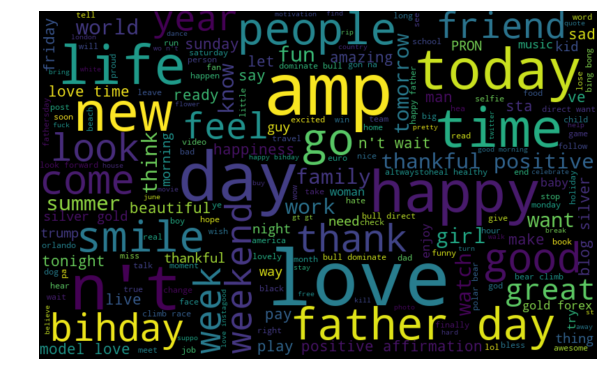

In [50]:
func_visualize(all_words_spacy)

### Most common words in non racist/sexist tweet

In [51]:
normal_words_spacy =' '.join([text for text in all_data['tweet_lemma_spacy'][all_data['label'] == 0]])

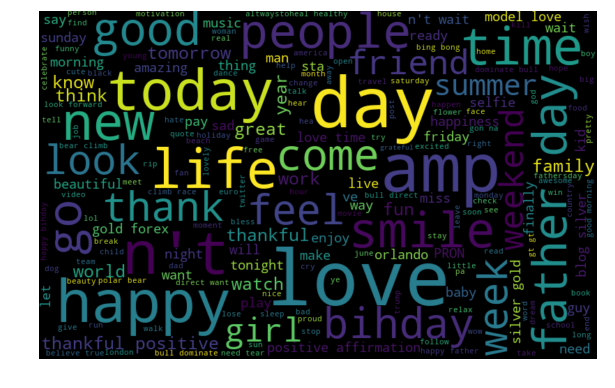

In [52]:
func_visualize(normal_words_spacy)

<font size ='3'>Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets.</font>

### Racist/Sexist Tweets

In [53]:
negative_words = ' '.join([text for text in all_data['tweet_lemma_spacy'][all_data['label'] == 1]])

In [55]:
type(negative_words)

str

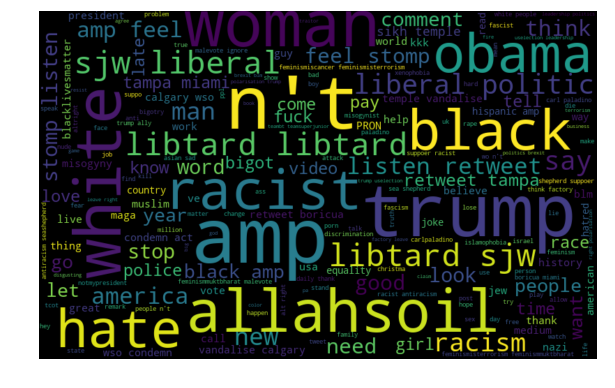

In [54]:
func_visualize(negative_words)

<font size ='4'> We observe that words like ***hate***, ***white***, ***black***, ***racism*** etc occur regularly in racist tweets</font>

In [148]:
all_data[all_data['label'] == 1].shape

(2242, 13)

## Visualizing NER


<font size ='3'>spaCy has an **'ner'** pipeline component that identifies token spans fitting a predetermined set of named entities. These are available as the `ents` property of a `Doc` object.</font>

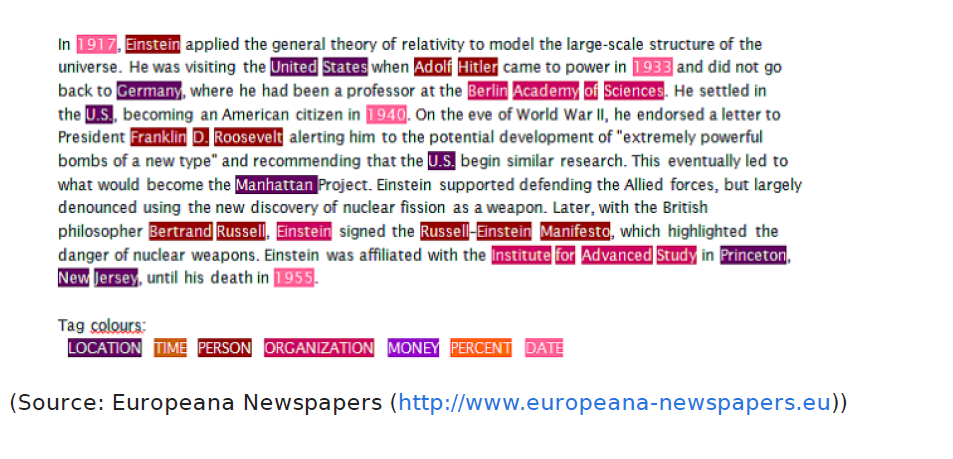

### NER Tags

Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

<br>

<font size ='4'> Visualizations of the people, nationalities, groups, organizations mentioned in the tweets using the `PERSON` and `NORP` type of **.label_** attribute of entities</font>
<br>

In [159]:
list_1 = []

In [160]:
named_entity_recogonition =  all_data['tweet_lemma_spacy'].loc[0:40000].apply(lambda x: [ent.text for ent in nlp(x).ents if (ent.label_ == 'PERSON' or ent.label_ == 'NORP' )])

In [161]:
for i in named_entity_recogonition:
        list_1.extend(i)

In [162]:
persons_mentioned = ' '.join(list_1)

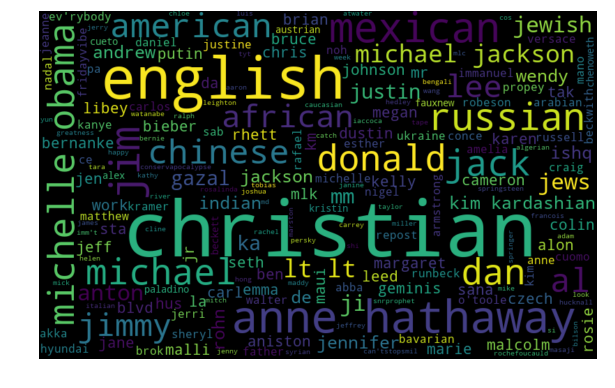

In [163]:
func_visualize(persons_mentioned)

## Understanding the impact of Hashtags on tweets sentiment

In [296]:
# function to collect hashtags

In [297]:
 
def hashtag_extract(x):    
    hashtags = []  
# Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

### extracting hashtags from non racist/sexist tweets

In [298]:
HT_regular = hashtag_extract(all_data['tweet_lemma_nltk'][all_data['label'] == 0]) 

In [299]:
# unnesting list 
HT_regular = sum(HT_regular,[])

In [300]:
from collections import Counter
Occurence_HT = Counter(HT_regular)

In [301]:
df_regular_HT = pd.DataFrame({'Hashtag': list(Occurence_HT.keys()),'Count': list(Occurence_HT.values())}) 
df_regular_HT = df_regular_HT.sort_values('Count', ascending = False)
df_regular_HT = df_regular_HT.set_index('Hashtag')

In [302]:
df_regular_HT.head()

,Count
Hashtag,
love,1596
positive,880
smile,581
healthy,576
thankful,496


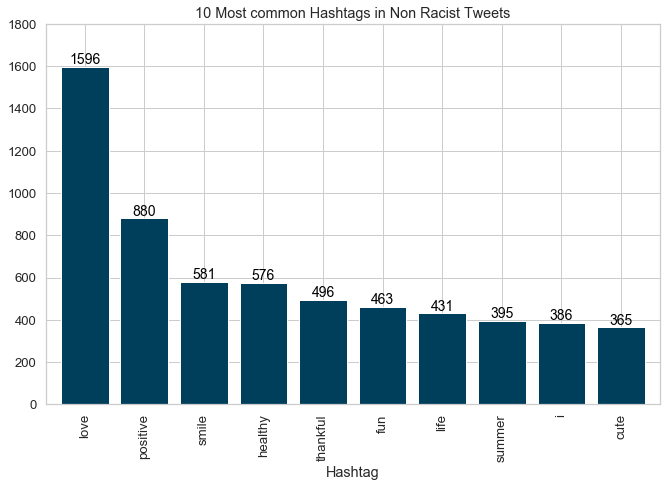

In [303]:
fig = plt.subplots(figsize=(11, 7))
ax = df_regular_HT['Count'].head(10).plot(kind = 'bar',color = '#003f5c',title ='10 Most common Hashtags in Non Racist Tweets',width = 0.8)
ax = plt.gca()
ax.set_ylim([0,1800]) #to set limit on y axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='Black', ha='center', va='bottom')

plt.show()


### extracting hashtags from racist/sexist tweets

In [304]:
HT_negative = hashtag_extract(all_data['tweet_lemma_nltk'][all_data['label'] == 1])

In [305]:
# unnesting list 
HT_negative = sum(HT_negative,[])

In [306]:
Occurence_HT_negative = Counter(HT_negative)

In [307]:
df_negative_HT = pd.DataFrame({'Hashtag': list(Occurence_HT_negative.keys()),'Count': list(Occurence_HT_negative.values())}) 
df_negative_HT = df_negative_HT.sort_values('Count', ascending = False)
df_negative_HT = df_negative_HT.set_index('Hashtag')

In [308]:
df_negative_HT.head()

,Count
Hashtag,
trump,136
politics,95
allahsoil,92
libtard,76
liberal,75


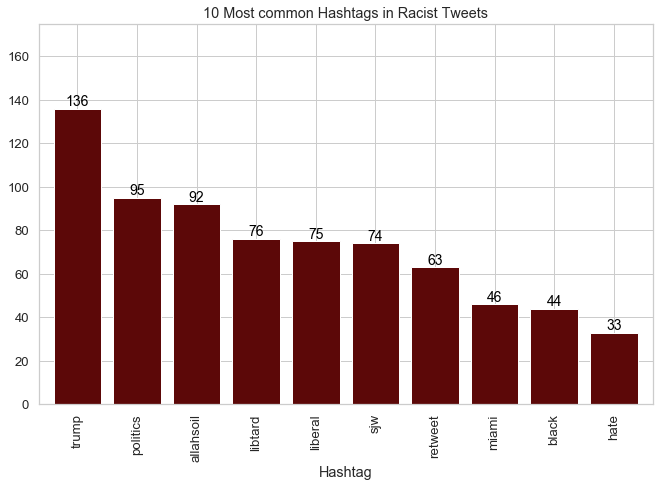

In [309]:
fig = plt.subplots(figsize=(11, 7))
ax = df_negative_HT['Count'].head(10).plot(kind = 'bar',color = '#5c0808',title ='10 Most common Hashtags in Racist Tweets',width = 0.8)
ax = plt.gca()
ax.set_ylim([0,175]) #to set limit on y axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='Black', ha='center', va='bottom')

plt.show()

In [310]:
all_data.head()

,id,label,tweet,tidy_tweet,token_nltk,token_spacy,tidy_tweet_spacy,tidy_tweet_nltk,tweet_stem,token_lemma_nltk,tweet_lemma_nltk,token_lemma_spacy,tweet_lemma_spacy
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,"[father, dysfunctional, selfish, drags, kids, dysfunction, #run]","[father, dysfunctional, selfish, drags, kids, dysfunction, #, run]",father dysfunctional selfish drags kids dysfunction # run,father dysfunctional selfish drags kids dysfunction #run,father dysfunct selfish drag kid dysfunct #run,"[father, dysfunctional, selfish, drag, kid, dysfunction, #run]",father dysfunctional selfish drag kid dysfunction #run,"[father, dysfunctional, selfish, drag, kid, dysfunction, #, run]",father dysfunctional selfish drag kid dysfunction # run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx #disapointed #getthanked,"[thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, vans, pdx, #disapointed, #getthanked]","[thanks, #, lyft, credit, use, cause, offer, wheelchair, vans, pdx, #, disapointed, #, getthanked]",thanks # lyft credit use cause offer wheelchair vans pdx # disapointed # getthanked,thanks #lyft credit can't use cause don't offer wheelchair vans pdx #disapointed #getthanked,thank #lyft credit can't use caus don't offer wheelchair van pdx #disapoint #getthank,"[thanks, #lyft, credit, can't, use, cause, don't, offer, wheelchair, van, pdx, #disapointed, #getthanked]",thanks #lyft credit can't use cause don't offer wheelchair van pdx #disapointed #getthanked,"[thanks, #, lyft, credit, use, because, offer, wheelchair, van, pdx, #, disapoint, #, getthank]",thanks # lyft credit use because offer wheelchair van pdx # disapoint # getthank
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, majesty]","[bihday, majesty]",bihday majesty,bihday majesty,bihday majesti,"[bihday, majesty]",bihday majesty,"[bihday, majesty]",bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,"[#model, love, time]","[#, model, love, time]",# model love time,#model love time,#model love time,"[#model, love, time]",#model love time,"[#, model, love, time]",# model love time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,"[factsguide, society, #motivation]","[factsguide, society, #, motivation]",factsguide society # motivation,factsguide society #motivation,factsguid societi #motiv,"[factsguide, society, #motivation]",factsguide society #motivation,"[factsguide, society, #, motivation]",factsguide society # motivation


<br>

<br>

# Model Building - Classification

<br>


In [311]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [312]:
import gensim

C:\Users\vaibhav\Anaconda3\envs\nlp_course\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Bag of words

<font size ='3'>
    
* Extracts word tokens
* Compute frequency of word tokens
* Construct a word vector out of these frequencies and vocabulary of corpus
</font>


<font size='3'> Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i)

<font size='3'>
D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –
</font>

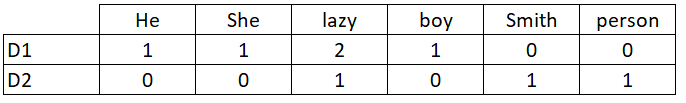


<br>

In [164]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(all_data['tweet_lemma_spacy']) 
bow.shape

(49159, 1000)

In [165]:
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 198393 stored elements in Compressed Sparse Row format>

<br>

## TF-IDF Features

<font size ='3'>This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

<font size ='3'>Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF </font>

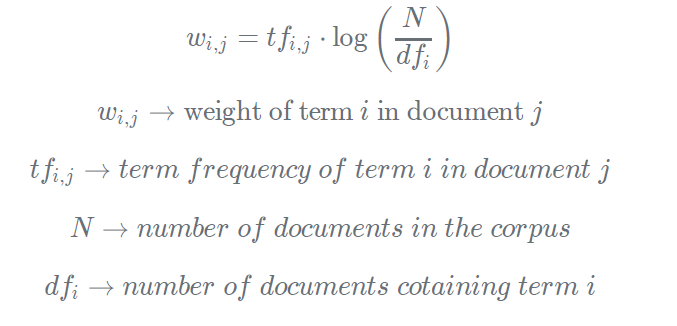

<br>

In [166]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(all_data['tweet_lemma_spacy'])
tfidf.shape

(49159, 1000)

In [167]:
tfidf

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 198393 stored elements in Compressed Sparse Row format>

<br>

### Number of unique words in the tweets available

In [318]:
freq_unique = pd.Series(' '.join(all_data['tidy_tweet_spacy']).split()).nunique()

print(f" Approximate number of unqiue words in the available tweets are {freq_unique}")

 Approximate number of unqiue words in the available tweets are 48872


<font size ='3'>As we observe from the shape of **BOW** and **TFIDF**, each tweet is represented by a 1000 dimensional array. Such a high dimensionality has significant computational power requirement. But if we reduce these dimension, we won't  be able to capture enough information. This is sometimes known as *the curse of dimensionality*. Even with 1000 dimensions, we aren't able to capture much information here, as you will see later with the accuracy of models using BOW and TFIDF features.
<br>
To be able to get all the available information out of the tweets, we would need to set ***max_features*** argument = **48872**. But this would require very high computational powers currently unavailable to users like us.</font>

<break>
<break>

## Word2Vec Features

<font size ='3'>Word vectors - also called *word embeddings* -are the modern way of representing words as vectors. They are mathematical descriptions of individual words such that words that appear frequently together in the language will have similar values. In this way we can mathematically derive *context*. The word vector for "lion" will be closer in value to "cat" than to "elephant".
<br>
<br>
 The objective of word embeddings is to *redefine the high dimensional word features into low dimensional feature vectors* by **preserving the contextual similarity in the corpus**. They are able to achieve tasks like ***King -man +woman = Queen***, which is mind-blowing. They achieve this my matching the **cosine similarity** of related words.
<br>
    <br>
Two or more words are said to be similar when the cosine of the angle between them = 1 or in other words the angle between them in the cosine plane is clase to zero.</font>

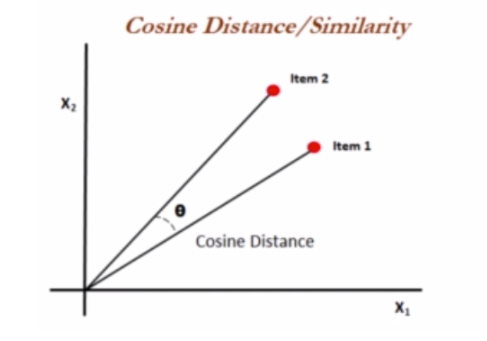



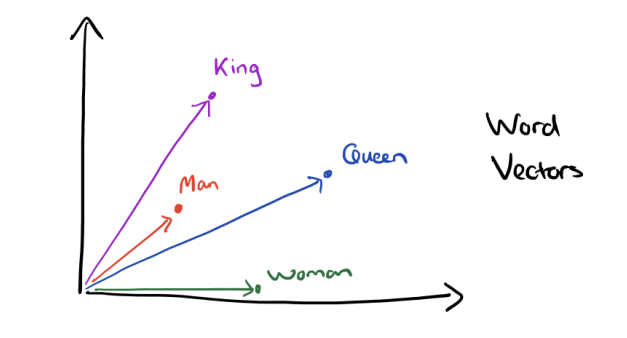

<font size ='3'>The advantages of using word embeddings over BOW or TF-IDF are:

* Dimensionality reduction - significant reduction in the no. of features required to build a model without much loss in information gain.

* It capture meanings of the words, semantic relationships and the different types of contexts they are used in.</fontt>

<font size ='3'>**Word2Vec** is not a single algorithm but a combination of two techniques – **CBOW (Continuous bag of words)** and **Skip-gram model**. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.</font>

### C-BOW 

<font size ='3'> This method takes the context of each word as the input and tries to predict the word corresponding to the context. A context may be a single adjacent word or a group of surrounding words.
There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.</font>

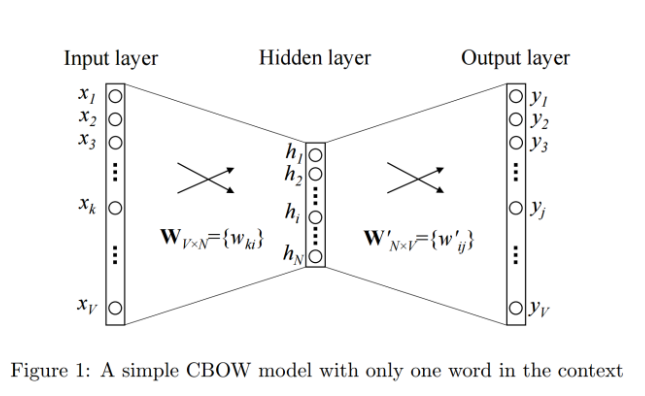

### Skip- gram

<font size ='3'>The Skip-gram model works in the reverse manner of the CBOW model, it tries to predict the context for a given word.Skip-gram predicts surrounding context words from the target words (inverse of CBOW).
Statistically, skip-gram treats each context-target pair as a new observation, and this tends to do better when we have larger datasets.</font>

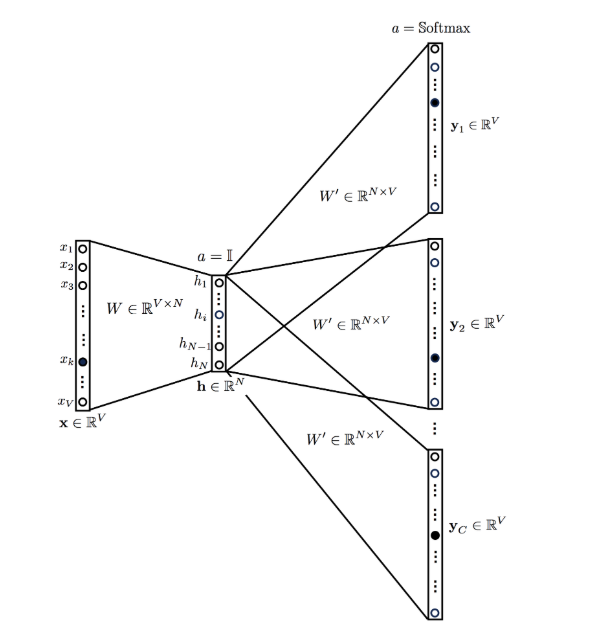

<font size = '3'>Both these methods have their own advantages and disadvantages. According to Mikolov, Skip Gram works well with small amount of data and is found to represent rare words well.
On the other hand, CBOW is faster and has better representations for more frequent words.</font>

<font size ='3'>We will go ahead with the Skip-gram model as it has the following advantages:

* It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

* Skip-gram with negative sub-sampling outperforms CBOW generally.</font>

<font size ='3'> Training our own word2vec model</font>

In [168]:
model_w2v = gensim.models.Word2Vec(
            all_data['token_lemma_spacy'],
            size=300, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

In [169]:
model_w2v.train(all_data['token_lemma_spacy'], total_examples= len(all_data['token_lemma_spacy']), epochs=20)

(6264137, 9236000)

In [170]:
model_w2v.wv.most_similar(positive="food")

[('foodblogger', 0.5414541363716125),
 ('integral', 0.5205579996109009),
 ('foodie', 0.5200326442718506),
 ('instafood', 0.5095054507255554),
 ('seafood', 0.5073546171188354),
 ('hotdog', 0.49975186586380005),
 ('delicious', 0.4992157220840454),
 ('fotd', 0.4976256191730499),
 ('bonding', 0.492850124835968),
 ('foodporn', 0.49178844690322876)]

<font size ='3'> Representation of the word  "Love"  in the vector form</font>

In [171]:
model_w2v['love']

array([-0.13923292, -0.09006337,  0.02183277, -0.30037302,  0.11216184,
        0.15343292,  0.0932419 ,  0.23096086,  0.05421595,  0.07198979,
        0.23907223, -0.2242458 ,  0.06691242,  0.4277049 , -0.16237025,
       -0.28171277, -0.2869622 ,  0.2958058 , -0.4039505 , -0.3171214 ,
        0.30339852,  0.13857178,  0.09444951,  0.09149159, -0.20775335,
       -0.30242205,  0.04749805,  0.0173577 , -0.17526026,  0.02415219,
       -0.34261167, -0.6477388 , -0.0749813 , -0.38627887, -0.09228175,
       -0.2125405 , -0.23836051, -0.2471103 , -0.32637662, -0.10657272,
       -0.24280286,  0.15530214, -0.0751626 , -0.13745953,  0.09341109,
        0.02497204,  0.2683942 ,  0.09571497, -0.34854248, -0.19742991,
       -0.12190775, -0.21817362, -0.3939504 , -0.11423942, -0.16944578,
       -0.20469645,  0.08346079,  0.04310887, -0.6036975 ,  0.30406502,
        0.00818136,  0.10771424,  0.18921585,  0.13576819,  0.01799619,
       -0.04791968,  0.20307383,  0.072262  ,  0.04163364, -0.36

In [172]:
model_w2v['love'].shape

(300,)

### Preparing Vectors for Tweets

<break>
<font size ='3'> Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 300. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 300 word2vec features for our data.</font>

In [173]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary continue
            if count != 0:
                vec /= count
    return vec

In [174]:
wordvec_arrays = np.zeros((len(all_data['token_lemma']), 300)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(all_data['token_lemma'][i], 300)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(49159, 300)

In [175]:
wordvec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.124519,-1.585634,-1.496335,-1.904257,0.068661,1.118431,0.786742,0.207163,-0.974387,-0.575034,...,-1.039075,0.379053,-1.750013,0.326503,-0.496454,-1.155953,-1.646644,1.676562,0.674973,0.056498
1,-0.279669,-0.671329,-0.142446,-0.415632,0.136715,0.357830,0.157526,0.281519,0.045157,-0.014333,...,-0.439195,0.032066,-0.662391,0.072985,-0.054235,-0.539820,-0.240095,0.102451,-0.113925,-0.045978
2,0.474618,-1.036902,-0.717214,0.081010,0.286290,0.452531,0.269522,-0.510057,0.019615,0.067658,...,-0.118250,-0.262211,-1.062116,-0.371272,-0.003581,-0.777622,-0.445380,0.003074,0.414882,0.112064
3,-0.620383,-1.194959,-0.994628,-0.782540,0.349103,0.122743,-0.001945,-0.208825,-0.133363,0.531482,...,0.553039,-0.391112,-0.986435,0.194991,0.536678,-0.262184,-0.252843,-0.368069,0.049730,0.355560
4,-0.833959,-0.609229,0.057843,-0.959165,0.950547,0.219828,-1.225534,-1.308730,-1.348457,0.443493,...,-0.588092,0.886680,-1.134116,1.023948,-0.201680,0.330607,-1.436755,0.357766,0.560935,-0.901090


In [176]:
### Using Spacy for word2vec conversion


In [177]:
# def func_word2vec (x):
#     doc_temp = nlp(u'x')
#     y = doc_temp.vector
#     return y

In [178]:
# all_data['wordvec'] = all_data['tweet_lemma'].apply(lambda x: func_word2vec(x))

In [179]:
# all_data['wordvec'].value_counts()

# Modeling

In [180]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
from xgboost import XGBClassifier

<font size ='3'> **Bag of Words Features**</font>

In [181]:
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:]

In [182]:
x_train_bow, x_valid_bow, y_train, y_valid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

<br>


<font size ='3'> **TF-IDF Features**</font>

In [183]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:]

In [184]:
x_train_tfidf = train_tfidf[y_train.index] 
x_valid_tfidf = train_tfidf[y_valid.index]

<font size ='3'> **Word2Vec Features**</font>

In [185]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 

In [186]:
x_train_w2v = train_w2v.iloc[y_train.index,:] 
x_valid_w2v = train_w2v.iloc[y_valid.index,:]

## Logisitc Regression

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
model_lg = LogisticRegression()
model_lg.fit(x_train_bow, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<font size ='3'> Using BOW features 

In [191]:
prediction = model_lg.predict_proba(x_valid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int) # calculating f1 score for the validation set

0.5335570469798657

In [192]:
model_lg = LogisticRegression()
model_lg.fit(x_train_tfidf, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<font size ='3'> Using TFIDF features 

In [193]:
prediction = model_lg.predict_proba(x_valid_tfidf) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int) # calculating f1 score for the validation set

0.5408252853380158

### Support Vector Machine (SVM)

In [194]:
from sklearn import svm

In [195]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_tfidf, y_train) 
prediction = svc.predict_proba(x_valid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int)

0.4972577696526509

In [1]:
# svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_w2v, y_train) 
# prediction = svc.predict_proba(x_valid_w2v) 
# prediction_int = prediction[:,1] >= 0.3 
# prediction_int = prediction_int.astype(np.int) 
# f1_score(y_valid, prediction_int)

### Random forest classifier

Bag-of-Words Features

First we will train our RandomForest model on the Bag-of-Words features and check its performance on validation set.

In [200]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(x_train_bow, y_train) 
prediction_rf = rf.predict(x_valid_bow) 
f1_score(y_valid, prediction_rf)

0.5236250968241674

In [202]:
rf.fit(x_train_tfidf, y_train) 
prediction_rf = rf.predict(x_valid_tfidf) 
f1_score(y_valid, prediction_rf)

0.5580110497237568

In [204]:
rf.fit(x_train_w2v, y_train) 
prediction_rf = rf.predict(x_valid_w2v) 
f1_score(y_valid, prediction_rf)

0.49015317286652077

### XGBoost classifier

In [207]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(x_train_bow, y_train) 
prediction_xgb = xgb_model.predict(x_valid_bow) 
f1_score(y_valid, prediction_xgb)

0.5043478260869566

In [209]:
xgb_model.fit(x_train_tfidf, y_train) 
prediction = xgb_model.predict(x_valid_tfidf) 
f1_score(y_valid, prediction)

0.528735632183908

In [210]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgb.fit(x_train_w2v, y_train) 
prediction_xgb = xgb.predict(x_valid_w2v) 
f1_score(y_valid, prediction_xgb)

0.6440366972477064